## Загрузим нужные библиотеки

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

%matplotlib inline

In [4]:
df = pd.read_csv("train.csv", nrows = 100000)

## Рассмотрим датасет по ближе

In [5]:
df.head(3)

,id,ticket_id,ticket_type_nm,entrance_id,entrance_nm,station_id,station_nm,line_id,line_nm,pass_dttm,time_to_under,label
0,1,40BD89EC85646EFB69E283F39C298E60,Пропуск FacePay,2402,Лефортово БКЛ,11007,Лефортово,11,Большая кольцевая,2022-09-12 05:00:13,216.316667,8001
1,2,126727A96489CC976A8C08E5CEB00542,СК учащегося 30 дней,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:54,648.183333,9011
2,3,D28CE6A9E0E5B6D213470A97CFF32485,БСК дружинника г.Москвы,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:55,865.333333,7022


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              100000 non-null  int64  
 1   ticket_id       100000 non-null  object 
 2   ticket_type_nm  100000 non-null  object 
 3   entrance_id     100000 non-null  int64  
 4   entrance_nm     100000 non-null  object 
 5   station_id      100000 non-null  int64  
 6   station_nm      100000 non-null  object 
 7   line_id         100000 non-null  int64  
 8   line_nm         100000 non-null  object 
 9   pass_dttm       100000 non-null  object 
 10  time_to_under   100000 non-null  float64
 11  label           100000 non-null  int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 9.2+ MB


Посмотрим на распределение двух основных величин 

<AxesSubplot:>

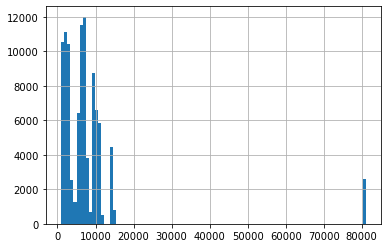

In [7]:
df["label"].hist(bins = 100)

<AxesSubplot:>

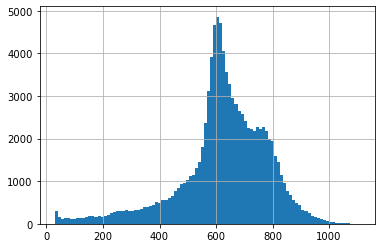

In [8]:
df["time_to_under"].hist(bins = 100)

Найдем наиболее популярную станцию

In [9]:
df["label"].value_counts()

3002     1502
7022     1390
6008     1229
1022     1146
5009     1135
         ... 
14004      18
13001       2
13005       1
13004       1
13003       1
Name: label, Length: 274, dtype: int64

In [10]:
df[df["label"] == int(df["label"].value_counts().index[0])].head()

,id,ticket_id,ticket_type_nm,entrance_id,entrance_nm,station_id,station_nm,line_id,line_nm,pass_dttm,time_to_under,label
60,61,764D546455E294FF9ACFB1A863A10E4B,Социальная карта жителя Моск. области,218,Новогиреево (Восточный),8003,Новогиреево,8,Калининская,2022-09-12 05:22:19,677.233333,3002
233,234,08C38EBE7D5FE076740767D284BC9461,90 дней ЕДИНЫЙ ТК,221,Перово (Восточный),8005,Перово,8,Калининская,2022-09-12 05:28:54,706.883333,3002
307,308,F13C0CD1665DC19E1344C679EDE629B3,30 дней ЕДИНЫЙ ТК,2227,Селигерская (Второй),10018,Селигерская,10,Люблинско-Дмитровская,2022-09-12 05:29:53,792.900000,3002
420,421,775F417B46D967439A38F3309F9F297C,30 дней ЕДИНЫЙ ТК,730,Дубровка,10007,Дубровка,10,Люблинско-Дмитровская,2022-09-12 05:30:24,290.266667,3002
526,527,402E9F04DAA4F79487D870516DE00CB5,КОШЕЛЕК,343,Сходненская (Первый),7018,Сходненская,7,Таганско-Краснопресненская,2022-09-12 05:30:53,829.166667,3002


Сделаем категорию **"ticket_type_nm"** раноговой 

In [11]:
df["ticket_type_nm"].value_counts()

КОШЕЛЕК                                                   23469
30 дней ЕДИНЫЙ ТК                                         18368
Социальная карта москвича                                 11364
30 дней                                                   10862
90 дней ЕДИНЫЙ ТК                                          6097
60 поездок ЕДИНЫЙ ТК                                       5210
30 дней Пригород ТК                                        4822
30 дней СК студента                                        2603
СК студента 30 дней                                        2291
365 дней ЕДИНЫЙ ТК                                         2189
30 дней СК учащегося                                       2038
ББК                                                        2005
СК учащегося 30 дней                                       1588
Социальная карта жителя Моск. области                      1553
90 дней                                                    1142
Пропуск FacePay                         

In [12]:
df["ticket_type_nm"] = pd.Categorical(df["ticket_type_nm"])
df["ticket_type_nm"].astype('category').cat.codes
df["ticket_type_nm"] = df["ticket_type_nm"].cat.codes

<AxesSubplot:xlabel='ticket_type_nm', ylabel='count'>

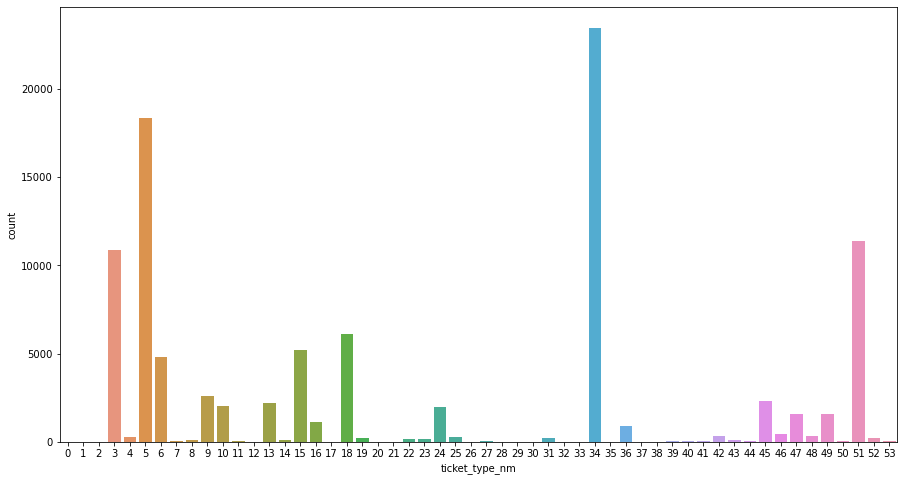

In [13]:
plt.figure(figsize=(15,8))
sns.countplot(x = "ticket_type_nm" , data  = df)  

Кажется нет четкой зависимости между категорией билета и временем между заходи на станцию

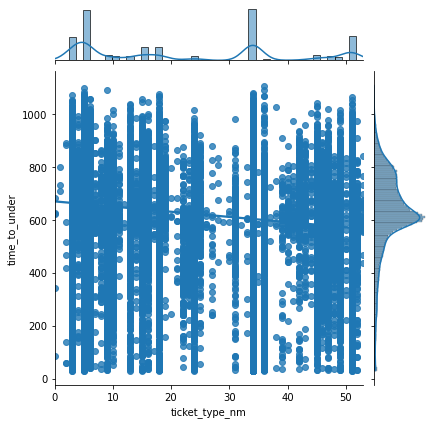

In [14]:
sns.jointplot(x = "ticket_type_nm", y = 'time_to_under', data = df, kind = 'reg')

Видоизменим категорию **"pass_dttm"**  

In [15]:
df["day"] = df.pass_dttm.map(lambda x: int(x.split("-")[2].split(" ")[0]))
df["hours"] = df.pass_dttm.map(lambda x: int(x.split("-")[2].split(" ")[1].split(":")[0]))

Добавим новый столбец в датсет и взглянем на то что у нас получилось

In [16]:
df.head(3)

,id,ticket_id,ticket_type_nm,entrance_id,entrance_nm,station_id,station_nm,line_id,line_nm,pass_dttm,time_to_under,label,day,hours
0,1,40BD89EC85646EFB69E283F39C298E60,36,2402,Лефортово БКЛ,11007,Лефортово,11,Большая кольцевая,2022-09-12 05:00:13,216.316667,8001,12,5
1,2,126727A96489CC976A8C08E5CEB00542,47,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:54,648.183333,9011,12,5
2,3,D28CE6A9E0E5B6D213470A97CFF32485,25,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:55,865.333333,7022,12,5


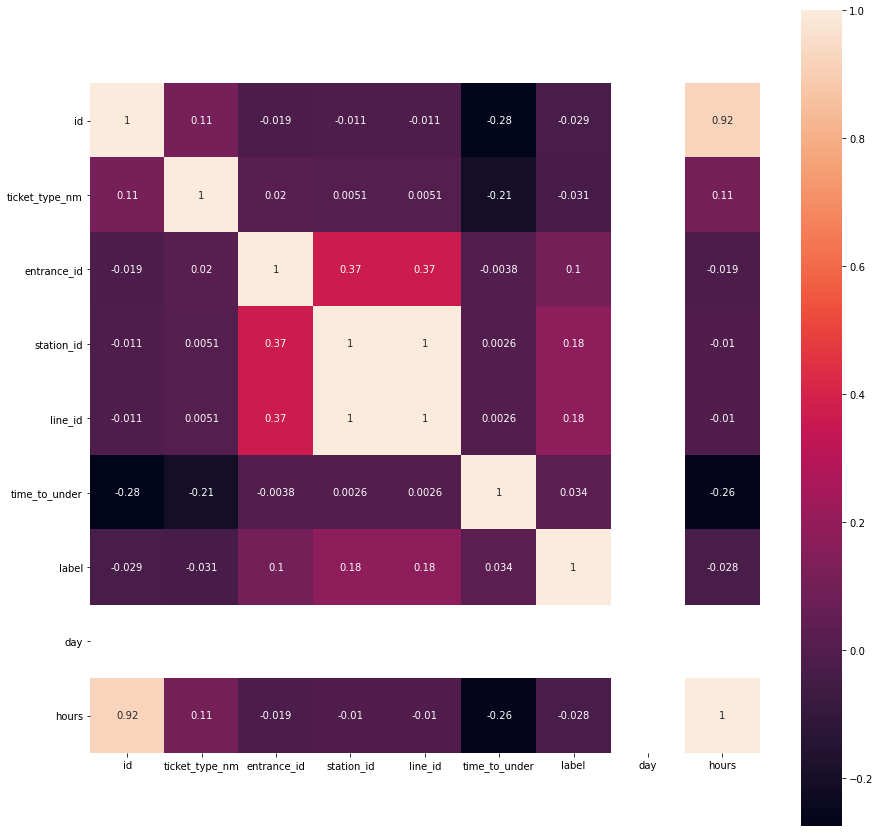

In [17]:
plt.rcParams['figure.figsize']=(15,15)

corr = df.corr()
g = sns.heatmap(corr, square = True, annot=True)

## Выделим выборки

In [18]:
X = df.drop(["ticket_id", "entrance_nm", "station_nm", "line_nm", "pass_dttm", "label","time_to_under"], axis = 1)
y = df[["time_to_under", "label"]]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [21]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

## Обучение модели

Для станции 

In [22]:
from sklearn.model_selection import GridSearchCV

param_grid = { 'n_estimators': range (10, 51, 10),
              'max_depth': range (1,13, 2),
              'min_samples_leaf': range (1,8),
              'min_samples_split': range (2,10,2)}

clf = RandomForestClassifier(random_state=42)

grid = GridSearchCV(clf, param_grid, cv=5)
grid.fit(X_train, y_train['label'])

In [23]:
clf.fit(X_train, y_train["label"])

RandomForestClassifier(random_state=0)

Для времени

In [24]:
reg = RandomForestRegressor(random_state=0)

In [25]:
reg.fit(X_train, y_train["time_to_under"])

RandomForestRegressor(random_state=0)

## Оценка точности

In [26]:
pred_class = clf.predict(X_test)
pred_reg = reg.predict(X_test)

In [27]:
from sklearn.metrics import recall_score, r2_score


score = 0.5 * recall_score(y_test["label"], pred_class , average='macro') +  0.5 * r2_score(y_test["time_to_under"], pred_reg)
score

/Users/speedyracer/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.05389206301109081

In [28]:
y_test["label"]

0         1005
1        11014
2         4006
3         2009
4         7014
         ...  
29995     9011
29996     3019
29997     7001
29998     5006
29999    10013
Name: label, Length: 30000, dtype: int64

In [29]:
pred_class

array([ 5001,  9009,  5002, ..., 15002,  1019,  1002])